In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("000_back_ear.jpg")
min_YCrCb = np.array([0,154,77],np.uint8)
max_YCrCb = np.array([255,183,140],np.uint8)
imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)
cv2.imwrite("skindetection.png", np.hstack([image,skinYCrCb]))



True

In [148]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
# Image operation using thresholding
img = cv2.imread('skindetection.png')
  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
ret, thresh = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU)

cv2.imwrite("threshbinary.png", thresh)

True

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

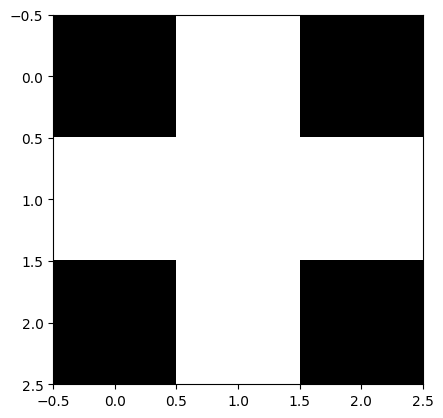

In [150]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(element, cmap='gray');

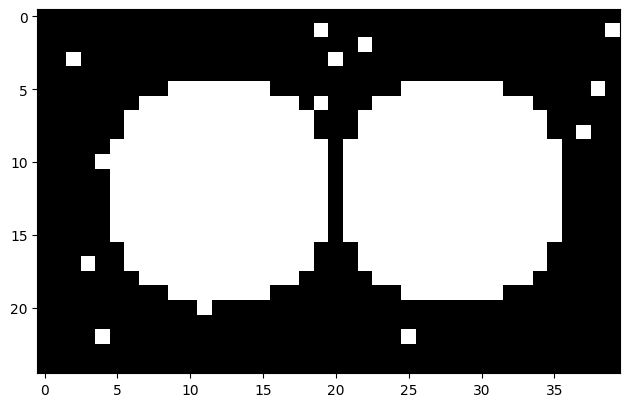

In [151]:
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range(20):
   circle_image[np.random.randint(25), np.random.randint(40)] = 1
imshow(circle_image);

Text(0.5, 1.0, 'Dilated Image')

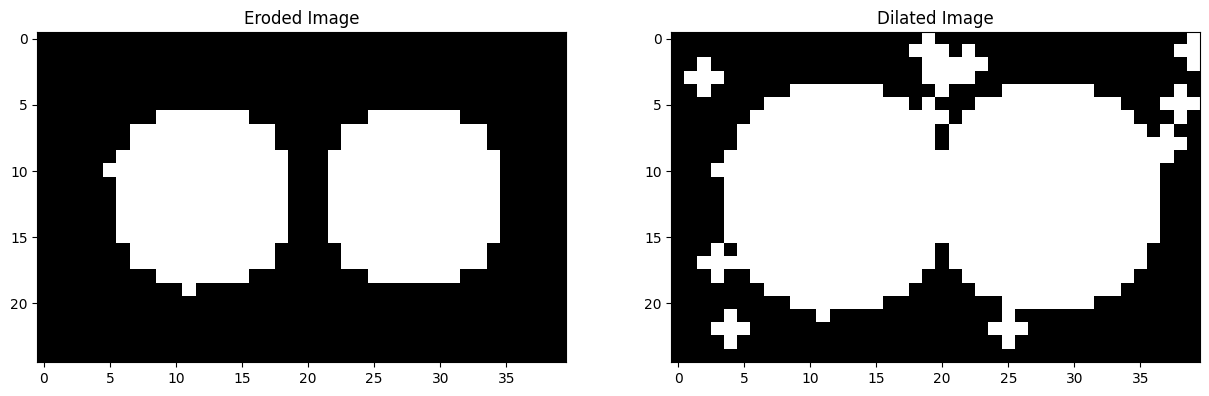

In [152]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(erosion(circle_image, element), cmap='gray');
ax[0].set_title('Eroded Image')
ax[1].imshow(dilation(circle_image, element), cmap='gray')
ax[1].set_title('Dilated Image')

Text(0.5, 1.0, 'Multi-Dilated Image')

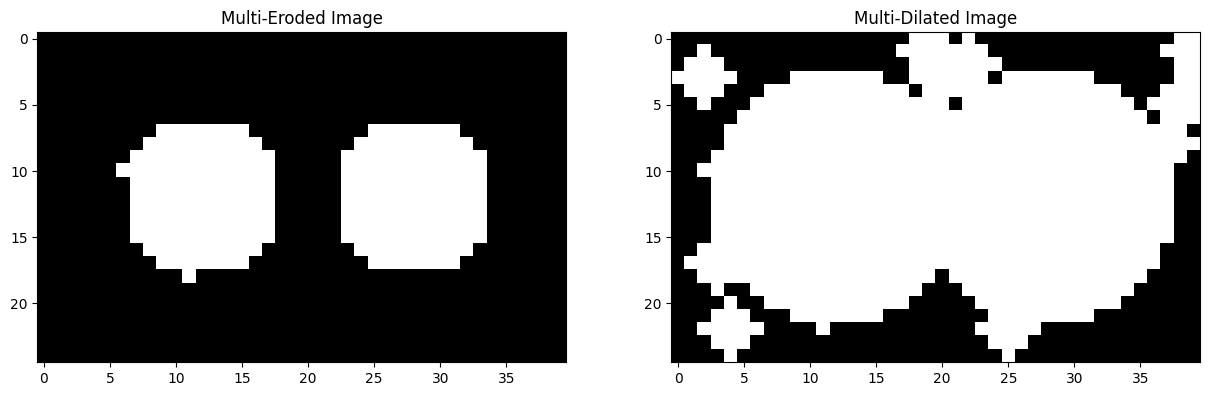

In [153]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')

Text(0.5, 1.0, 'Closed Image')

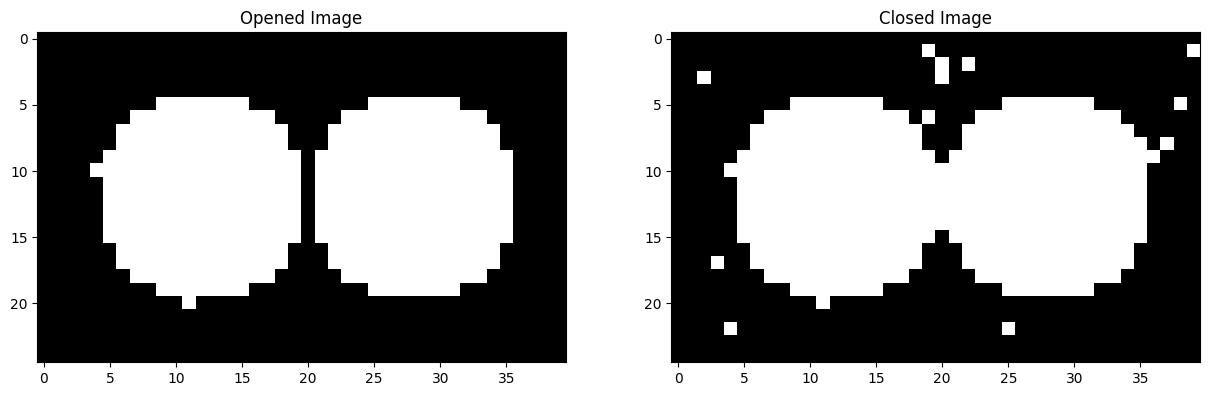

In [154]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(opening(circle_image, element), cmap='gray');
ax[0].set_title('Opened Image')
ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')

In [155]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])

True

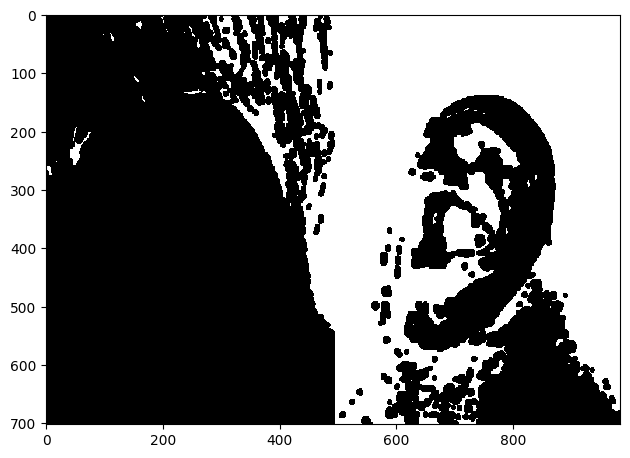

In [156]:
multi_eroded = multi_ero(thresh, 2, element)
imshow(multi_eroded)
import matplotlib.pyplot as plt
cv2.imwrite('initial.png', multi_eroded)
 
# plt.savefig("output.jpg")

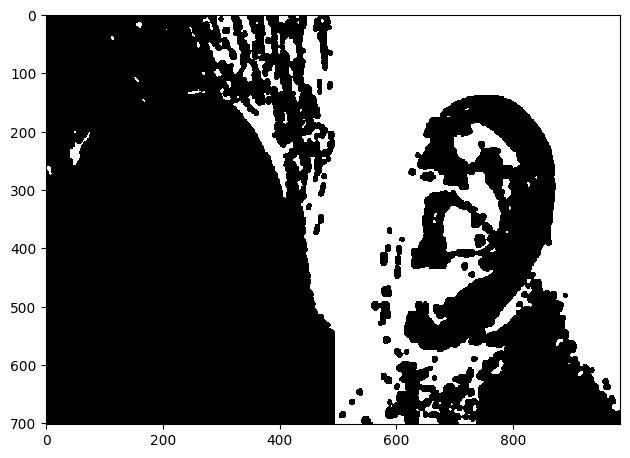

In [157]:
opened = opening(multi_eroded)
imshow(opened)


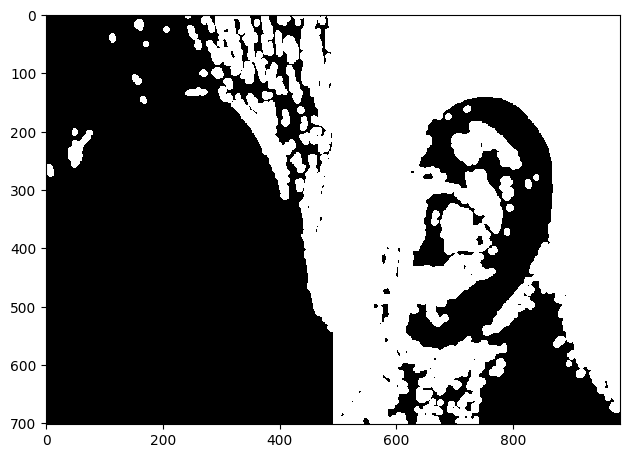

In [158]:
multi_diluted = multi_dil(opened, 2, element)
imshow(multi_diluted)

area_morphed


True

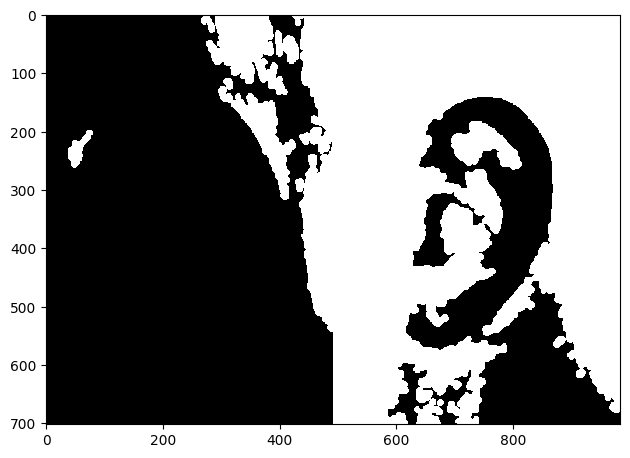

In [159]:
area_morphed = area_opening(area_closing(multi_diluted, 1000), 1000)
imshow(area_morphed)
print("area_morphed")
import matplotlib.pyplot as plt
 
# Bin = plt.savefig("output.jpg")
cv2.imwrite("morphological.png", area_morphed)

In [160]:
# # kernel = np.ones((5, 5), np.uint8)
Init = cv2.imread('initial.png')



kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
res = cv2.morphologyEx(Init,cv2.MORPH_CLOSE,kernel, iterations=10)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
#                             kernel, iterations = 2)

  
# # Background area using Dilation
bg = cv2.dilate(res, kernel, iterations = 3)
  
# dist_transform = cv2.distanceTransform(res, cv2.DIST_L2, 0)
# ret, fg = cv2.threshold(dist_transform, 0.02
#                         * dist_transform.max(), 255, 0)

# Bin1 = plt.savefig("outputt.jpg", )
  
# cv2.imshow('image', fg)
final = cv2.imwrite("initialmorphed.png", res )

In [161]:

import cv2
 
# read the image
image = cv2.imread('initialmorphed.png')
 
# B, G, R channel splitting
blue, green, red = cv2.split(image)
 
# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
 
# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
# cv2.imshow('Contour detection using blue channels only', image_contour_blue)
# cv2.waitKey(0)
# cv2.imwrite('blue_channel.jpg', image_contour_blue)
# cv2.destroyAllWindows()
 
# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
# cv2.imshow('Contour detection using green channels only', image_contour_green)
# cv2.waitKey(0)
cv2.imwrite('green_channel.jpg', image_contour_green)
# cv2.destroyAllWindows()
 
# detect contours using red channel and without thresholding
# contours3, hierarchy3 = cv2.findCon
# tours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# # draw contours on the original image
# image_contour_red = image.copy()
# cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# # see the results
# # cv2.imshow('Contour detection using red channels only', image_contour_red)
# # cv2.waitKey(0)
# cv2.imwrite('red_channel.jpg', image_contour_red)
# cv2.destroyAllWindows()

True

In [162]:
import cv2
import numpy as np
 
img3 = cv2.imread('green_channel.jpg')
print(img3.shape) # Print image shape
# cv2.imshow("original", img)
 
# Cropping an image

# nparray.shape(img3)
# print

cropped_image = img3[98:601,550:984]
 
# Display cropped image
# cv2.imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(702, 984, 3)


True

In [163]:
import numpy as np
# import cv2 as cv
img4 = cv2.imread('Cropped Image.jpg')
gray= cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img5=cv2.drawKeypoints(gray,kp,img4)
cv2.imwrite('sift_keypoints.jpg',img5)


True

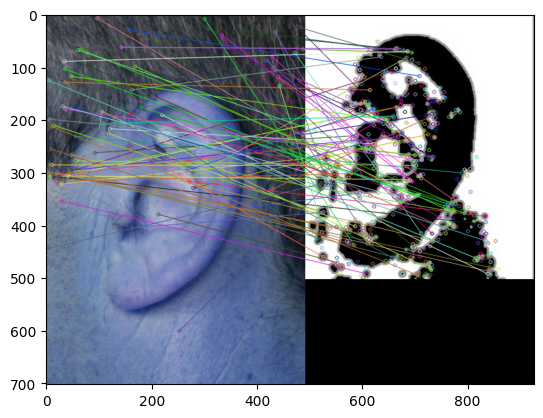

(<matplotlib.image.AxesImage at 0x16c35def9d0>, None)

In [164]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread(r"D:\Prayag Files\TIET\Extras\Ear Detection\ear detection biometrics\subset-1\000_back_ear.jpg") 
img2 = cv2.imread(r"D:\Prayag Files\TIET\Extras\Ear Detection\sift_keypoints.jpg") 

# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.imshow(img3),plt.show()

In [165]:
import cv2
import os

# Create a new folder to store the SIFT results
output_folder = "D:\Prayag Files\TIET\Extras\Ear Detection\database"
os.makedirs(output_folder, exist_ok=True)

# Path to the input images folder
input_folder = "D:\Prayag Files\TIET\Extras\Ear Detection\subset-1"

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Initialize the SIFT detector
        sift = cv2.SIFT_create()

        # Detect keypoints and compute descriptors
        keypoints, descriptors = sift.detectAndCompute(image, None)

        # Save the image with keypoints drawn to the output folder
        output_image_path = os.path.join(output_folder, filename)
        output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        cv2.imwrite(output_image_path, output_image)

In [166]:
import cv2
import os

# Path to the reference image
reference_image_path = "D:\Prayag Files\TIET\Extras\Ear Detection\sift_keypoints.jpg"
# reference_image_path = "D:\Prayag Files\TIET\Extras\Ear Detection\reference.jpg"

# Path to the folder containing SIFT-detected images
sift_images_folder = "D:\Prayag Files\TIET\Extras\Ear Detection\database"

# Load the reference image and its keypoints
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()
reference_keypoints, reference_descriptors = sift.detectAndCompute(reference_image, None)

# Create a FLANN-based matcher
flann = cv2.FlannBasedMatcher()

# Process each sift-detected image in the folder
for filename in os.listdir(sift_images_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the sift-detected image
        sift_image_path = os.path.join(sift_images_folder, filename)
        sift_image = cv2.imread(sift_image_path, cv2.IMREAD_GRAYSCALE)

        # Compute keypoints and descriptors for the sift-detected image
        sift_keypoints, sift_descriptors = sift.detectAndCompute(sift_image, None)

        # Perform feature matching between the reference image and sift-detected image
        matches = flann.knnMatch(reference_descriptors, sift_descriptors, k=2)

        # Apply ratio test to filter good matches
        good_matches = []
        for m, n in matches:
            if m.distance < 0.7 * n.distance:
                good_matches.append(m)

        # Make decision based on the number of good matches
        if len(good_matches) > 1:  # Adjust this threshold as per your needs
            print(f"Image {filename}: Yes")
        else:
            print(f"Image {filename}: No")


Image 000_back_ear.jpg: Yes
Image 000_down_ear.jpg: Yes
Image 000_front_ear.jpg: Yes
Image 000_left_ear.jpg: Yes
Image 000_right_ear.jpg: No
Image 000_up_ear.jpg: No
Image 000_zoom_ear.jpg: No
Image 001_back_ear.jpg: Yes
Image 001_down_ear.jpg: Yes
Image 001_front_ear.jpg: Yes
Image 001_left_ear.jpg: Yes
Image 001_right_ear.jpg: Yes
Image 001_up_ear.jpg: Yes
Image 001_zoom_ear.jpg: Yes
Image 002_back_ear.jpg: Yes
Image 002_down_ear.jpg: No
Image 002_front_ear.jpg: Yes
Image 002_left_ear.jpg: Yes
Image 002_right_ear.jpg: Yes
Image 002_up_ear.jpg: Yes
Image 002_zoom_ear.jpg: No
Image 003_back_ear.jpg: Yes
Image 003_down_ear.jpg: Yes
Image 003_front_ear.jpg: Yes
Image 003_left_ear.jpg: Yes
Image 003_right_ear.jpg: No
Image 003_up_ear.jpg: Yes
Image 003_zoom_ear.jpg: Yes
Image 004_back_ear.jpg: Yes
Image 004_down_ear.jpg: Yes
Image 004_front_ear.jpg: Yes
Image 004_left_ear.jpg: Yes
Image 004_right_ear.jpg: Yes
Image 004_up_ear.jpg: No
Image 004_zoom_ear.jpg: No
Image 005_back_ear.jpg: Yes


In [167]:
import os
from sklearn.metrics import classification_report

def matches():
    # Simulated predicted values from the matches function
    predicted_values = ["yes", "no", "yes", "yes", "no", "yes", "no", "yes", "no", "no"]
    
    return predicted_values

def generate_classification_report():
    # Path to the folder containing input images
    database_folder = "D:\Prayag Files\TIET\Extras\Ear Detection\database"

    # Get the list of image filenames in the database folder
    image_filenames = os.listdir(database_folder)

    # Simulated ground truth labels (replace with your actual labels)
    ground_truth_labels = ["yes", "no", "no", "yes", "yes", "no", "no", "yes", "no", "yes"]

    # Get predicted values from the matches function
    predicted_values = matches()

    # Generate the classification report
    report = classification_report(ground_truth_labels, predicted_values)

    # Print the report
    print(report)


# Call the function to generate and print the classification report
generate_classification_report()

              precision    recall  f1-score   support

          no       0.60      0.60      0.60         5
         yes       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [168]:
# import os
# from sklearn.metrics import classification_report

# def generate_classification_report():
#     # Path to the folder containing input images
#     database_folder = "D:\Prayag Files\TIET\Extras\Ear Detection\database"

#     # Get the list of image filenames in the database folder
#     image_filenames = os.listdir(database_folder)

#     # Simulated predicted values from the matches function
#     predicted_values = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

#     # Simulated ground truth labels (replace with your actual labels)
#     ground_truth_labels = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

#     # Generate the classification report
#     report = classification_report(ground_truth_labels, predicted_values)

#     # Print the report
#     print(report)


# # Call the function to generate and print the classification report
# generate_classification_report()

In [169]:
# import pandas as pd
# import numpy as np
# import os
# import tensorflow as tf
# import cv2
# from tensorflow import keras
# from keras.layers.core import Dense,Flatten
# # from tensorflow.keras import layers, Dense,Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model
# from  matplotlib import pyplot as plt
# import matplotlib.image as mpimg

In [170]:

# img_folder=r'D:\Prayag Files\TIET\Extras\Ear Detection\subset-1'
# IMG_WIDTH=200
# IMG_HEIGHT=200

In [171]:
# import random


# plt.figure(figsize=(20,20))
# test_folder=r'D:\Prayag Files\TIET\Extras\Ear Detection\subset-1'
# for i in range(5):
#     file = random.choice(os.listdir(img_folder))
#     image_path= os.path.join(img_folder, file)
#     img=mpimg.imread(image_path)
#     ax=plt.subplot(1,5,i+1)
#     ax.title.set_text(file)
#     plt.imshow(img)